In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from iminuit import Minuit
from data_tools import *

filepath = "data/total_dataset.pkl"
total_dataset = load_dataset(filepath)
filtered_dataset = filter_dataset(total_dataset)

data_bins = split_into_bins(filtered_dataset)

c:\Users\Katie\Documents\TBPS\data_tools.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pf_df[i[0]][pf_df[i[0]] < 0] = 0
c:\Users\Katie\Documents\TBPS\data_tools.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pf_df[i[1]][pf_df[i[1]] < 0] = 0
c:\Users\Katie\Documents\TBPS\data_tools.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pf_df[i[2]][pf_df[i[2]] < 0] = 0
c:\Users\Katie\Documents\TBPS\data_tools.py:88: SettingWit

In [38]:
# Try plotting the data for a particular bin

bin_number = 1
number_of_bins_in_hist = 25

bin = data_bins[bin_number]

In [39]:
from acceptance_func import *

# Obtain the acceptance function for this bin
acceptance_func = get_acceptance_func(bin_number, number_of_bins_in_hist)

c:\Users\Katie\Documents\TBPS\data_tools.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pf_df[i[0]][pf_df[i[0]] < 0] = 0
c:\Users\Katie\Documents\TBPS\data_tools.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pf_df[i[1]][pf_df[i[1]] < 0] = 0
c:\Users\Katie\Documents\TBPS\data_tools.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pf_df[i[2]][pf_df[i[2]] < 0] = 0
c:\Users\Katie\Documents\TBPS\data_tools.py:88: SettingWit

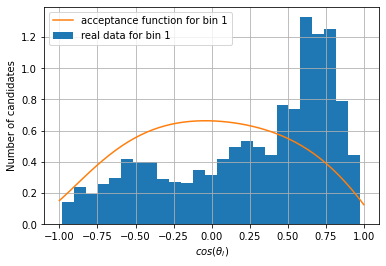

In [40]:
# Plot the angular distribution

plt.hist(bin["costhetal"], bins=number_of_bins_in_hist, density=True, label="real data for bin %i" % bin_number)
x = np.linspace(-1,1,50)
plt.plot(x, acceptance_func(x), label="acceptance function for bin %i" % bin_number)
plt.xlabel(r'$cos(\theta_l)$')
plt.ylabel('Number of candidates')
plt.legend()
plt.grid()

### Precompute the acceptance functions for every bin

In [5]:
acceptance_funcs = [get_acceptance_func(i, number_of_bins_in_hist) for i in range(len(data_bins))]
normalisation_factors = [get_normalisation_factor(p) for p in acceptance_funcs]

c:\Users\Katie\Documents\TBPS\data_tools.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pf_df[i[0]][pf_df[i[0]] < 0] = 0
c:\Users\Katie\Documents\TBPS\data_tools.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pf_df[i[1]][pf_df[i[1]] < 0] = 0
c:\Users\Katie\Documents\TBPS\data_tools.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pf_df[i[2]][pf_df[i[2]] < 0] = 0
c:\Users\Katie\Documents\TBPS\data_tools.py:88: SettingWit

In [6]:
normalisation_factors

[2.0023515108691368,
 2.0010912284996594,
 1.9998683951713716,
 1.9996995634914632,
 1.9994569048976278,
 1.9999350299340506,
 1.9995404028853696,
 2.0000960397608645,
 2.0002116612077887,
 1.9998196946206896]

### Run the skeleton code with our acceptance functions

In [27]:
def d2gamma_p_d2q2_dcostheta(fl, afb, cos_theta_l, acceptance_func, normalisation_factor):
    """
    Returns the pdf defined above
    :param fl: f_l observable
    :param afb: a_fb observable
    :param cos_theta_l: cos(theta_l)
    :return:
    """
    ctl = cos_theta_l
    c2tl = 2 * ctl ** 2 - 1
    acceptance = 1/acceptance_func(cos_theta_l) # 1/acceptance_func because we want to invert the warping
    scalar_array = 3/8 * (3/2 - 1/2 * fl + 1/2 * c2tl * (1 - 3 * fl) + 8/3 * afb * ctl) * acceptance
    #normalised_scalar_array = scalar_array * 2  # normalising scalar array to account for the non-unity acceptance function
    normalised_scalar_array = scalar_array / normalisation_factor
    return normalised_scalar_array

def log_likelihood(fl, afb, bin_number):
    """
    Returns the negative log-likelihood of the pdf defined above
    :param fl: f_l observable
    :param afb: a_fb observable
    :param _bin: number of the bin to fit
    :return:
    """
    bin_number = int(bin_number)
    _bin = data_bins[bin_number]
    ctl = _bin['costhetal']

    acceptance_func = acceptance_funcs[bin_number]
    normalisation_factor = normalisation_factors[bin_number]

    normalised_scalar_array = d2gamma_p_d2q2_dcostheta(fl=fl, afb=afb, cos_theta_l=ctl, acceptance_func=acceptance_func, normalisation_factor=normalisation_factor)
    return - np.sum(np.log(normalised_scalar_array))

C:\Users\Katie\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Katie\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


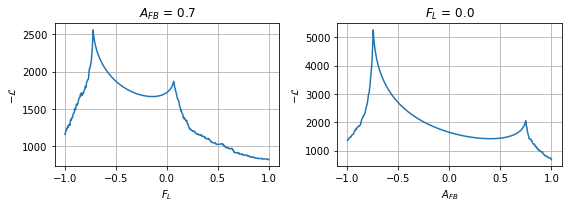

In [28]:
_test_bin = 3
_test_afb = 0.7
_test_fl = 0.0

x = np.linspace(-1, 1, 500)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
ax1.plot(x, [log_likelihood(fl=i, afb=_test_afb, bin_number=_test_bin) for i in x])
ax1.set_title(r'$A_{FB}$ = ' + str(_test_afb))
ax1.set_xlabel(r'$F_L$')
ax1.set_ylabel(r'$-\mathcal{L}$')
ax1.grid()
ax2.plot(x, [log_likelihood(fl=_test_fl, afb=i, bin_number=_test_bin) for i in x])
ax2.set_title(r'$F_{L}$ = ' + str(_test_fl))
ax2.set_xlabel(r'$A_{FB}$')
ax2.set_ylabel(r'$-\mathcal{L}$')
ax2.grid()
plt.tight_layout()
plt.show()

### Fitting values of $A_{FB}$ and $F_L$ for every bin

In [29]:
bin_number_to_check = 0  # bin that we want to check in more details in the next cell
bin_results_to_check = None

log_likelihood.errordef = Minuit.LIKELIHOOD
decimal_places = 3
starting_point = [-0.1,0.0]
fls, fl_errs = [], []
afbs, afb_errs = [], []
for i in range(len(data_bins)):
    m = Minuit(log_likelihood, fl=starting_point[0], afb=starting_point[1], bin_number=i)
    m.fixed['bin_number'] = True  # fixing the bin number as we don't want to optimize it
    m.limits=((-1.0, 1.0), (-1.0, 1.0), None)
    m.migrad()
    m.hesse()
    if i == bin_number_to_check:
        bin_results_to_check = m
    fls.append(m.values[0])
    afbs.append(m.values[1])
    fl_errs.append(m.errors[0])
    afb_errs.append(m.errors[1])
    print(f"Bin {i}: {np.round(fls[i], decimal_places)} pm {np.round(fl_errs[i], decimal_places)},", f"{np.round(afbs[i], decimal_places)} pm {np.round(afb_errs[i], decimal_places)}. Function minimum considered valid: {m.fmin.is_valid}")

Bin 0: 0.45 pm 0.048, 0.203 pm 0.024. Function minimum considered valid: True
Bin 1: 0.248 pm 0.04, 0.398 pm 0.02. Function minimum considered valid: True
Bin 2: 0.215 pm 0.034, 0.445 pm 0.018. Function minimum considered valid: True
Bin 3: 0.15 pm 0.031, 0.38 pm 0.017. Function minimum considered valid: True
Bin 4: 0.304 pm 0.025, 0.258 pm 0.014. Function minimum considered valid: True
Bin 5: 0.354 pm 0.055, 0.183 pm 0.032. Function minimum considered valid: True
Bin 6: 0.283 pm 0.075, 0.195 pm 0.043. Function minimum considered valid: True
Bin 7: 0.405 pm 0.04, 0.193 pm 0.023. Function minimum considered valid: True
Bin 8: 0.196 pm 0.02, 0.404 pm 0.01. Function minimum considered valid: True
Bin 9: 0.329 pm 0.048, 0.196 pm 0.028. Function minimum considered valid: True


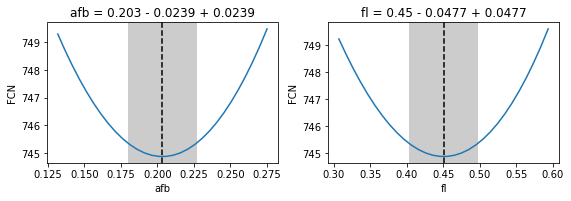

In [30]:
plt.figure(figsize=(8, 5))
plt.subplot(221)
bin_results_to_check.draw_mnprofile('afb', bound=3)
plt.subplot(222)
bin_results_to_check.draw_mnprofile('fl', bound=3)
plt.tight_layout()
plt.show()

### Plotting the fit for a particular bin

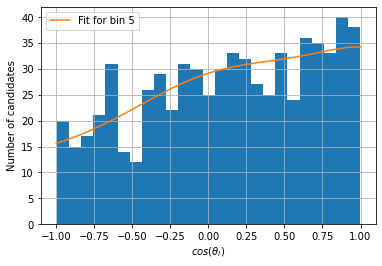

In [45]:
bin_to_plot = 5
cos_theta_l_bin = data_bins[bin_to_plot]['costhetal']
hist, _bins, _ = plt.hist(cos_theta_l_bin, bins=number_of_bins_in_hist)
x = np.linspace(-1, 1, number_of_bins_in_hist)
pdf_multiplier = np.sum(hist) * (np.max(cos_theta_l_bin) - np.min(cos_theta_l_bin)) / number_of_bins_in_hist
y = d2gamma_p_d2q2_dcostheta(fl=fls[bin_to_plot], afb=afbs[bin_to_plot], cos_theta_l=x, acceptance_func=acceptance_funcs[bin_to_plot], normalisation_factor=normalisation_factors[bin_to_plot]) * pdf_multiplier
plt.plot(x, y, label=f'Fit for bin {bin_to_plot}')
plt.xlabel(r'$cos(\theta_l)$')
plt.ylabel(r'Number of candidates')
plt.legend()
plt.grid()
plt.show()

### Visualise the results for every bin

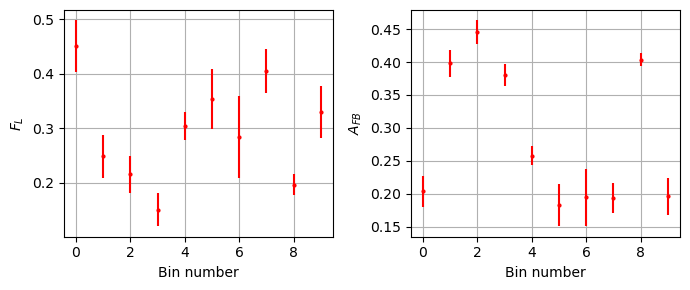

In [46]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3), dpi=100)
ax1.errorbar(np.linspace(0, len(data_bins) - 1, len(data_bins)), fls, yerr=fl_errs, fmt='o', markersize=2, label=r'$F_L$', color='red')
ax2.errorbar(np.linspace(0, len(data_bins) - 1, len(data_bins)), afbs, yerr=afb_errs, fmt='o', markersize=2, label=r'$A_{FB}$', color='red')
ax1.grid()
ax2.grid()
ax1.set_ylabel(r'$F_L$')
ax2.set_ylabel(r'$A_{FB}$')
ax1.set_xlabel(r'Bin number')
ax2.set_xlabel(r'Bin number')
plt.tight_layout()
plt.show()
